In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn. metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv('milknew.csv') #https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

df['Grade'] = LabelEncoder().fit_transform(df['Grade'])
df[list(df)[:-1]] = StandardScaler().fit_transform(df[list(df)[:-1]])

X = df.drop('Grade', axis = 1)
y = df['Grade']

df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,-0.021531,-0.914107,0.910503,-0.872962,0.699608,-0.982217,0.501600,0
1,-0.021531,-0.815035,-1.098294,1.145525,-1.429372,1.018105,0.269333,0
2,1.336564,2.553438,0.910503,1.145525,0.699608,1.018105,-1.356536,1
3,2.051351,-1.013180,0.910503,1.145525,-1.429372,1.018105,0.733867,1
4,-0.021531,-0.715962,-1.098294,-0.872962,-1.429372,-0.982217,0.733867,2


1. Зниження розмірності і візуалізація даних

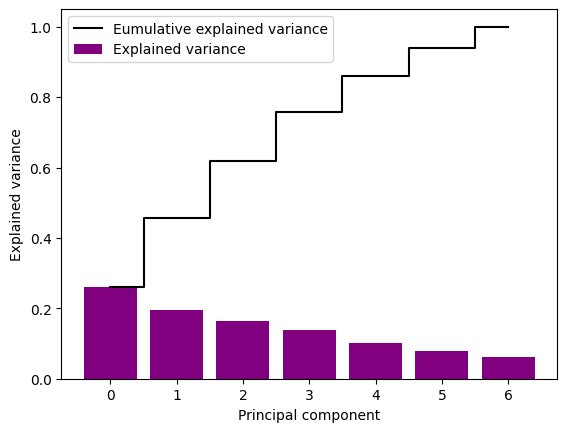

In [3]:
# PCA: pc and info percentage

pca = PCA()
X_pca = pca.fit_transform(X)

exp_var = pca.explained_variance_ratio_
cum_sum = np.cumsum(exp_var)

plt.bar(range(0, len(exp_var)), exp_var, label='Explained variance', color = 'purple')
plt.step(range(0, len(cum_sum)), cum_sum, where='mid', label='Eumulative explained variance', color = 'black')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend()
plt.show()


,pca_1,pca_2,Grade
0,0.345935,-1.382269,0
1,-0.101817,0.296910,0
2,-1.543892,2.675939,1


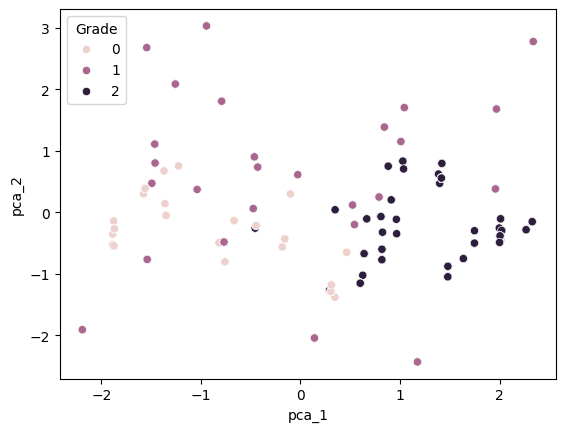

In [4]:
# PCA

pca = PCA(n_components=2)
X2_pca  = pca.fit_transform(X)

X2_pca_df = pd.DataFrame({'pca_1': X2_pca[:,0], 'pca_2': X2_pca[:,1], 'Grade': y})
sns.scatterplot(x='pca_1', y='pca_2', hue='Grade', data=X2_pca_df)

X2_pca_df.head(3)

,tsne_1,tsne_2,Grade
0,-41.884129,-245.588989,0
1,11.225402,73.345924,0
2,-223.353806,109.432388,1


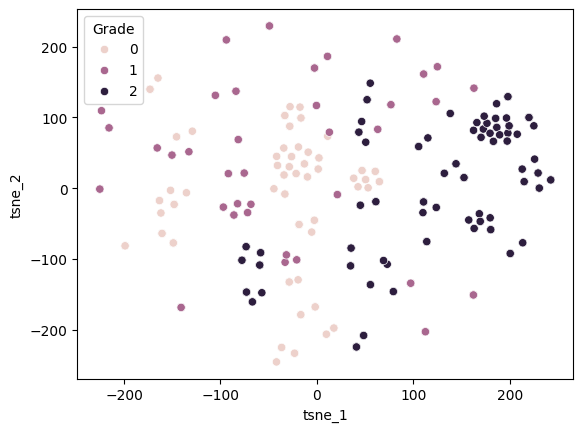

In [5]:
# TSNE 

tsne = TSNE(n_components=2)
X2_tsne  = tsne.fit_transform(X)

X2_tsne_df = pd.DataFrame({'tsne_1': X2_tsne[:,0], 'tsne_2': X2_tsne[:,1], 'Grade': y})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Grade', data=X2_tsne_df)

X2_tsne_df.head(3)

2. Кластерний аналіз

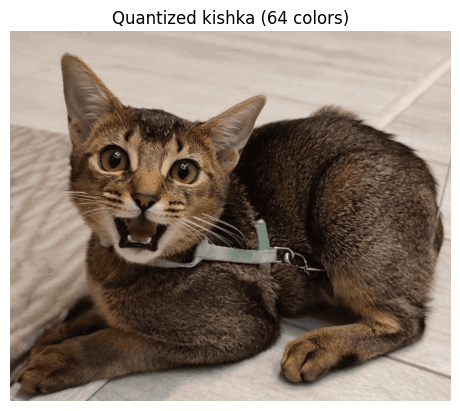

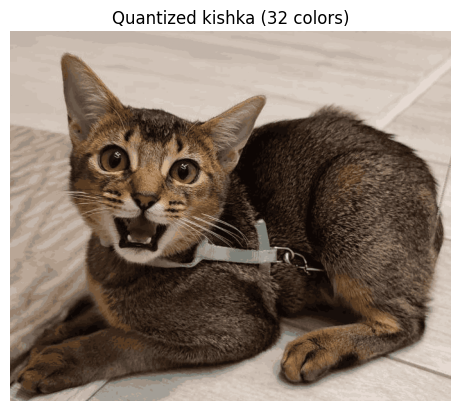

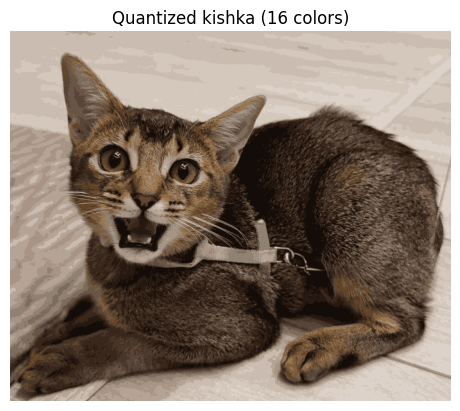

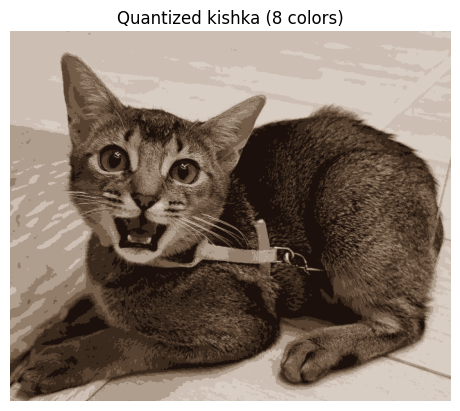

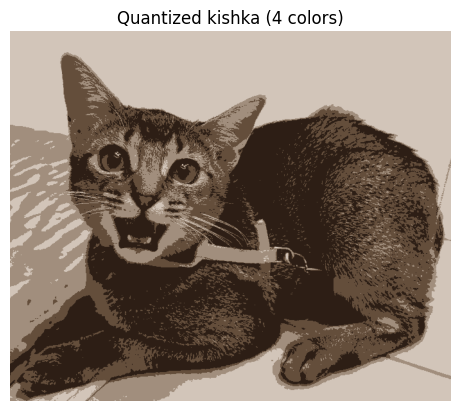

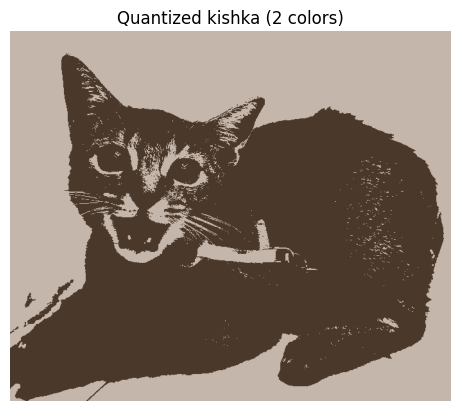

In [6]:
# k-means

n_colors = [64, 32, 16, 8, 4, 2]
image = np.array(Image.open('cat.jpg'), dtype=np.float64) / 255

w, h, d = tuple(image.shape)
image_array = np.reshape(image, (w * h, d))

for i in range(len(n_colors)):
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors[i], random_state=0).fit(image_array_sample)
    label = kmeans.predict(image_array)
    plt.figure()
    plt.axis("off")
    plt.title(f"Quantized kishka ({n_colors[i]} colors)")
    plt.imshow(kmeans.cluster_centers_[label].reshape(w, h, -1))

3. Обробка та класифікація текстових даних

In [7]:
df = pd.read_csv('suicide.csv') # https://www.kaggle.com/datasets/aunanya875/suicidal-tweet-detection-dataset

df.dropna(inplace = True)
df['Suicide'] = LabelEncoder().fit_transform(df['Suicide'])

df.head()

,Tweet,Suicide
0,making some lunch,0
1,@Alexia You want his money.,0
2,@dizzyhrvy that crap took me forever to put to...,1
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,0
4,Trying out &quot;Delicious Library 2&quot; wit...,0


In [8]:
# data preprocessing

def clean_text(text):
   text = text.lower()
   text = re.sub("@\S+", " ", text)
   text = re.sub("https*\S+", " ", text)
   text = re.sub("#\S+", " ", text)
   text = re.sub("&quot", " ", text)
   text = re.sub("&\S+", " ", text)
   text = re.sub("â\S+", " ", text)
   text = re.sub("ð\S+", " ", text)
   text = re.sub("–", " ", text)
   text = re.sub("rt", " ", text)
   text = re.sub("\d", " ", text)
   text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
   text = re.sub('\n', ' ', text)
   text = re.sub('\s{2,}',' ', text)
   text = ' '.join([word for word in text.split(' ') if word not in stopwords.words("english")])
   return text

df['Tweet'] = df['Tweet'].apply(clean_text)
df.head()

,Tweet,Suicide
0,making lunch,0
1,want money,0
2,crap took forever put together going go sleep...,1
3,hey jer since sta twittering,0
4,trying delicious library mixed results bar cod...,0


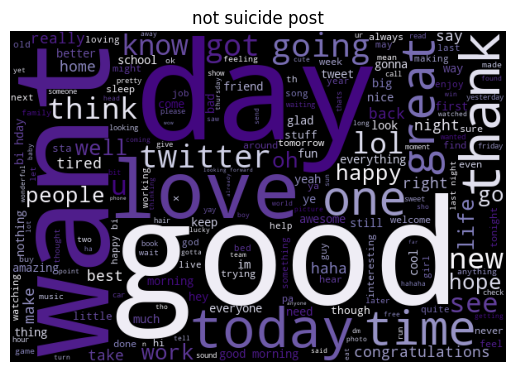

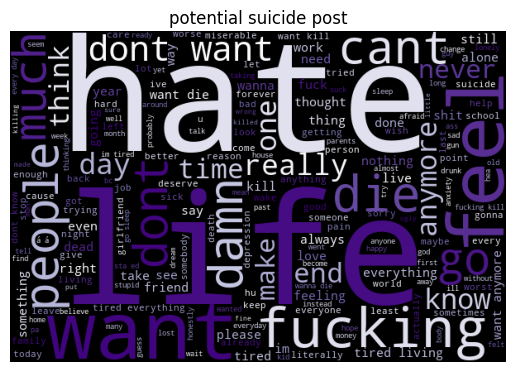

In [9]:
# data visualization

for i in [0, 1]:
    text = ''
    for tw in df[df['Suicide'] == i]['Tweet']:
        text += tw + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="black", colormap='Purples_r').generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('potential suicide post') if i else plt.title('not suicide post')
    plt.show()

In [12]:
# text vectorization and train/test split
 
X = df['Tweet']
y = df['Suicide']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cv = CountVectorizer(max_features=1000, ngram_range=(1, 2))
X_train_vectorised = cv.fit_transform(X_train)
X_test_vectorised = cv.transform(X_test)

In [13]:
print('*Logistic Regression*\n')

logreg_model = LogisticRegression()
logreg_model.fit(X_train_vectorised, y_train)
y_pred = logreg_model.predict(X_test_vectorised)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

*Logistic Regression*

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       225
           1       0.96      0.80      0.88       132

    accuracy                           0.92       357
   macro avg       0.93      0.89      0.91       357
weighted avg       0.92      0.92      0.91       357

[[221   4]
 [ 26 106]]


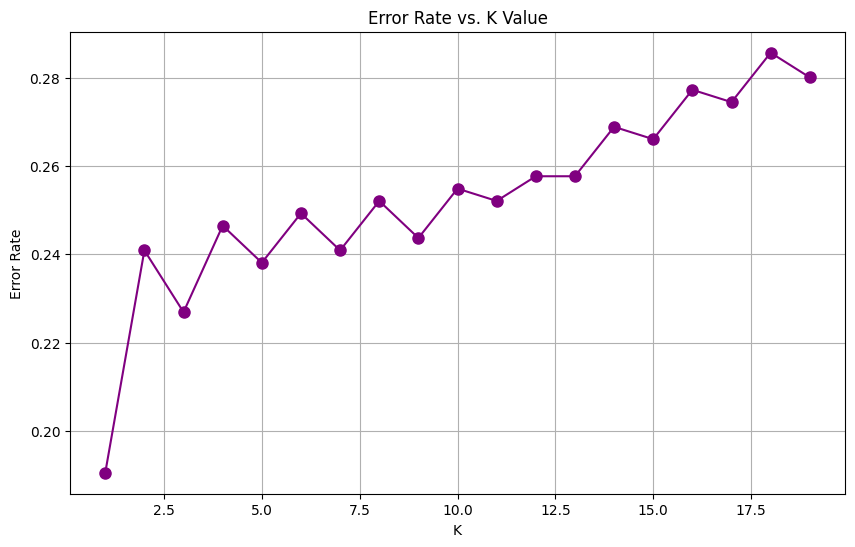

In [14]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_vectorised,y_train)
    pred_i = knn.predict(X_test_vectorised)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, marker='o', markersize=8, color='purple')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [15]:
print('*KNN*\n')

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_vectorised, y_train)
y_pred = knn_model.predict(X_test_vectorised)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

*KNN*

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       225
           1       0.94      0.52      0.67       132

    accuracy                           0.81       357
   macro avg       0.86      0.75      0.77       357
weighted avg       0.84      0.81      0.79       357

[[221   4]
 [ 64  68]]


In [16]:
print('*Decision Tree*\n')

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_vectorised, y_train)
y_pred = tree_model.predict(X_test_vectorised)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

*Decision Tree*

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       225
           1       0.87      0.84      0.86       132

    accuracy                           0.90       357
   macro avg       0.89      0.88      0.89       357
weighted avg       0.90      0.90      0.90       357

[[209  16]
 [ 21 111]]


In [17]:
print('*SVC*\n')

svc_model = SVC()
svc_model.fit(X_train_vectorised, y_train)
y_pred = svc_model.predict(X_test_vectorised)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

*SVC*

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       225
           1       0.96      0.78      0.86       132

    accuracy                           0.91       357
   macro avg       0.92      0.88      0.90       357
weighted avg       0.91      0.91      0.91       357

[[221   4]
 [ 29 103]]


In [18]:
print('*Multinomial Naive Bayes*\n')

mnb_model = MultinomialNB()
mnb_model.fit(X_train_vectorised, y_train)
y_pred = mnb_model.predict(X_test_vectorised)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

*Multinomial Naive Bayes*

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       225
           1       0.81      0.86      0.84       132

    accuracy                           0.87       357
   macro avg       0.86      0.87      0.87       357
weighted avg       0.88      0.87      0.87       357

[[198  27]
 [ 18 114]]
